In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.activations import linear, relu, sigmoid # type: ignore

In [2]:
def rmse(y, yhat):
    n, m = y.shape
    diff = y - yhat
    err = np.sqrt(np.sum(diff**2, axis=1)) 
    return np.mean(err)

In [3]:
data = pd.read_excel("simulated_data.xlsx")
data.shape

(7776, 305)

In [4]:
X = data.iloc[:, :300]
y = data.iloc[:, 300:]
print(X.shape)
print(y.shape)

(7776, 300)
(7776, 5)


In [93]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=0)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)
print(X_train.shape, X_cv.shape, X_test.shape)
print(y_train.shape, y_cv.shape, y_test.shape)

(6220, 300) (778, 300) (778, 300)
(6220, 5) (778, 5) (778, 5)


In [95]:
tf.random.set_seed(9)
model = Sequential(
    [
        tf.keras.layers.InputLayer((300,)),
        Dense(80, activation="relu", name="L1"),
        Dense(40, activation="relu", name="L2"),
        Dense(15, activation="relu", name="L3"),
        Dense(5, activation="linear", name="L4"),
    ]
)
model.compile(optimizer='adam', loss='mse') 

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 80)                24080     
                                                                 
 L2 (Dense)                  (None, 40)                3240      
                                                                 
 L3 (Dense)                  (None, 15)                615       
                                                                 
 L4 (Dense)                  (None, 5)                 80        
                                                                 
Total params: 28015 (109.43 KB)
Trainable params: 28015 (109.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=100)

Epoch 1/100
195/195 [==============================] - 1s 2ms/step - loss: 0.0367 - val_loss: 0.0271
Epoch 2/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.0257
Epoch 3/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0283
Epoch 4/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0210
Epoch 5/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0218 - val_loss: 0.0205
Epoch 6/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0237
Epoch 7/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0218
Epoch 8/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0198
Epoch 9/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0217
Epoch 10/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0207 - val_lo

In [98]:
model.evaluate(X_train, y_train)

195/195 [==============================] - 0s 963us/step - loss: 0.0138


0.013799691572785378

In [99]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)

Test Loss: 0.016163120046257973


In [100]:
epochs = range(1, len(history.history['loss']) + 1)
test_losses = [test_loss] * len(epochs)

In [101]:
loss = history.history['loss']
val_loss = history.history['val_loss']

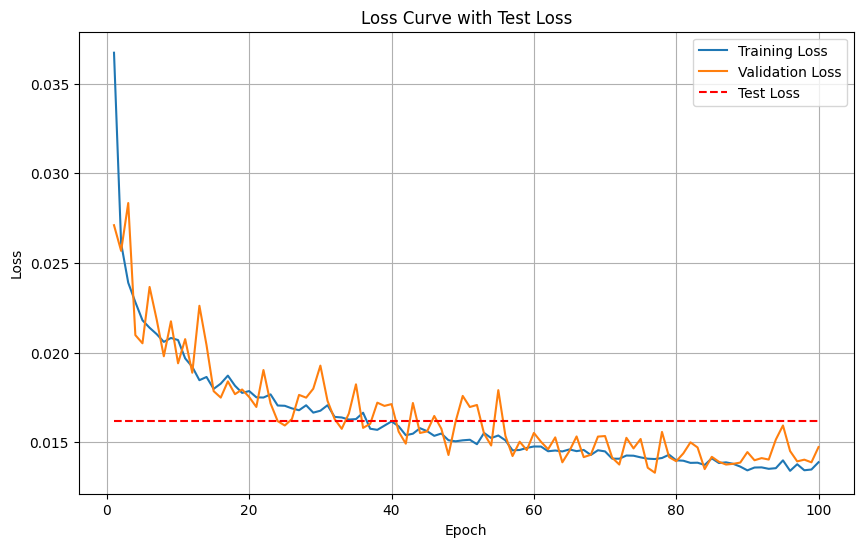

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.plot(epochs, test_losses, 'r--', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve with Test Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def normalisation(k_Ca):
    min_Ca = np.min(k_Ca)
    max_Ca = np.max(k_Ca)
    return (k_Ca - min_Ca) / (max_Ca - min_Ca)

def lirinzel_ns(v2, a2, IP3, d5, k3):
    c0, c1 = 2, 0.185
    v1, v3 = 6, 0.9
    d1, d2, d3, Nd = 0.13, 1.049, 0.9434, 2
    time = np.arange(0, 300, 0.1)
    dt = 0.1
    Ca, h = [0.1], [0.1]  # Initialize lists

    # ODE solving
    for _ in range(1, len(time)):  # Start from index 1 to avoid index errors
        CaER = (c0 - Ca[-1]) / c1
        pinf = IP3 / (IP3 + d1)
        ninf = Ca[-1] / (Ca[-1] + d5)
        Q2 = d2 * (IP3 + d1) / (IP3 + d3)
        tauh = 1 / (a2 * (Q2 + Ca[-1]))
        hinf = Q2 / (Q2 + Ca[-1])
        alphah = hinf / tauh
        betah = (1 - hinf) / tauh
        dh = alphah * (1 - h[-1]) - betah * h[-1]
        dCa = (c1 * v1 * pinf**3 * ninf**3 * h[-1]**3 * (CaER - Ca[-1]) +
               c1 * v2 * (CaER - Ca[-1]) -
               v3 * Ca[-1]**2 / (Ca[-1]**2 + k3**2))
        
        # Append new values instead of assigning to an index
        Ca.append(Ca[-1] + dCa * dt)
        h.append(h[-1] + dh * dt)

    # Convert to NumPy array for interpolation
    Ca = np.array(Ca)
    Ca_norm = normalisation(Ca)

    return Ca_norm

In [105]:
def plot_graphs(n, x, y, yhat):
    time = np.arange(0, 300, 1)
    p, q = x.shape
    for i in range(n):
        j = np.random.randint(0, p)
        plt.figure(figsize=(14, 4))

        plt.subplot(121)
        plt.scatter(y.iloc[j], yhat.iloc[j], c='blue')
        plt.plot([y.iloc[j].min(), y.iloc[j].max()],
                [y.iloc[j].min(), y.iloc[j].max()], 'r--')
        plt.title("Parameter Prediction")
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.grid(True)

        plt.subplot(122)
        plt.plot(time, x.iloc[j], c='blue', label="Original", linewidth=2)
        plt.plot(time, lirinzel_ns(yhat.iloc[j, 0], yhat.iloc[j, 1], yhat.iloc[j, 2], yhat.iloc[j, 3], yhat.iloc[j, 4]), 
                 linewidth=2, c="red", label="Predicted")    
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title("Time series prediction")
        plt.legend()
        plt.tight_layout()
        plt.show()

## **Training set**

In [106]:
yhat = model.predict(X_train)
yhat = pd.DataFrame(yhat)
yhat

195/195 [==============================] - 0s 797us/step


,0,1,2,3,4
0,0.192009,0.198612,0.230119,0.116783,0.200461
1,0.227107,0.191751,0.148120,0.143265,0.202769
2,0.099332,0.335940,0.572820,0.086215,0.152447
3,0.245867,0.373117,0.437574,0.096914,0.253795
4,0.136913,0.153529,0.444102,0.100457,0.080756
...,...,...,...,...,...
6215,0.196213,0.236110,0.522578,0.105769,0.199455
6216,0.175575,0.276370,0.545409,0.061662,0.198179
6217,0.200741,0.024195,0.913781,0.130563,0.185958
6218,0.174445,0.265650,0.630484,0.077828,0.182154


In [107]:
y_train

,v2,a2,IP3,d5,k3
7196,0.161549,0.249941,0.098905,0.109698,0.157024
1362,0.233976,0.250560,0.098905,0.109698,0.272739
7315,0.161549,0.249941,0.678186,0.004980,0.039951
6147,0.293397,0.339615,0.432218,0.046061,0.225123
6955,0.161549,0.134219,0.098905,0.004980,0.039951
...,...,...,...,...,...
4931,0.217040,0.339615,0.320078,0.109698,0.140326
3264,0.131523,0.249941,0.571412,0.046061,0.272739
1653,0.233976,0.036026,1.364390,0.109698,0.225123
2607,0.131523,0.250560,0.571412,0.120110,0.225123


In [108]:
rmse(np.array(y_train), np.array(yhat))

0.21067196540478486

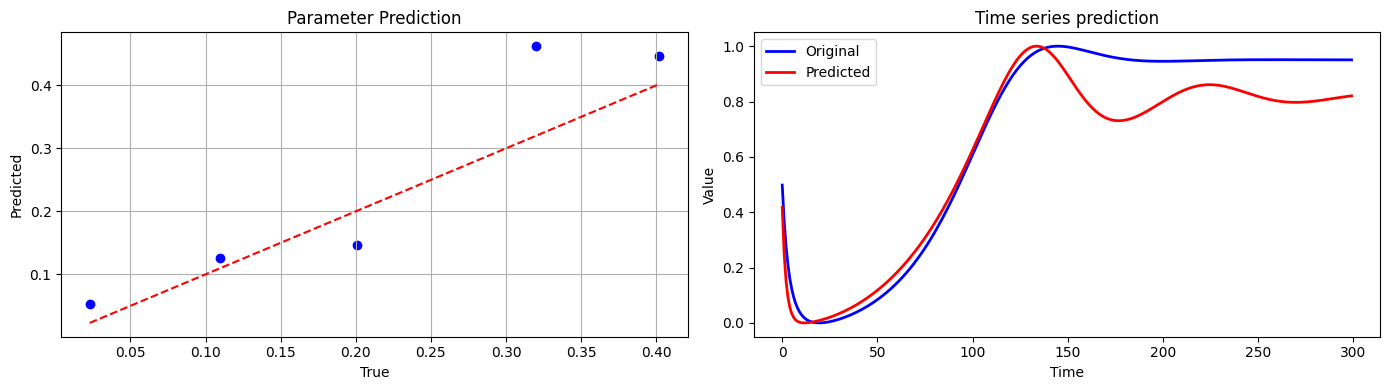

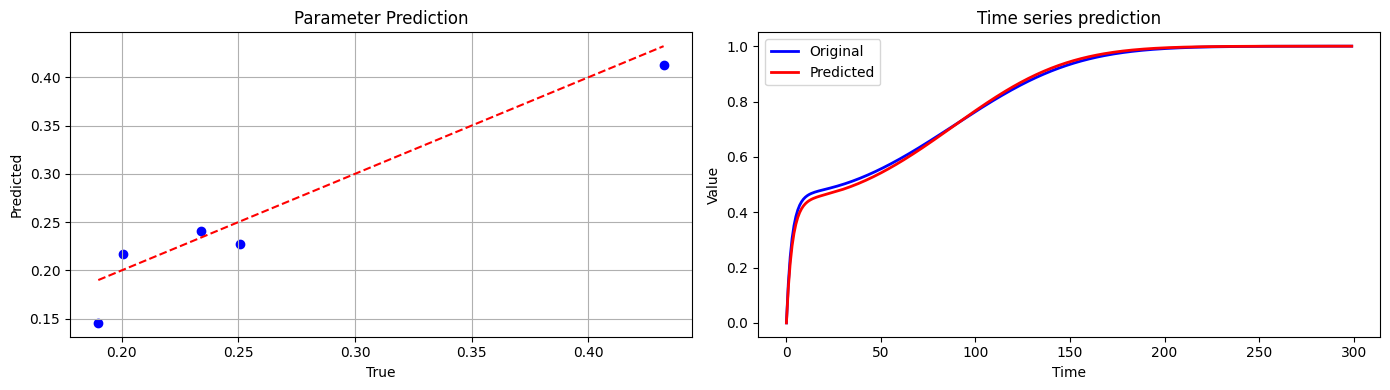

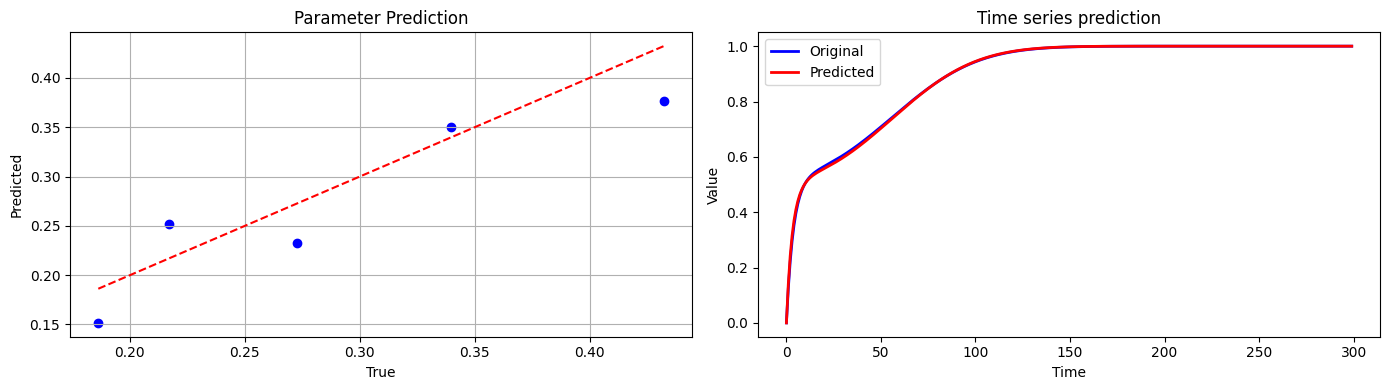

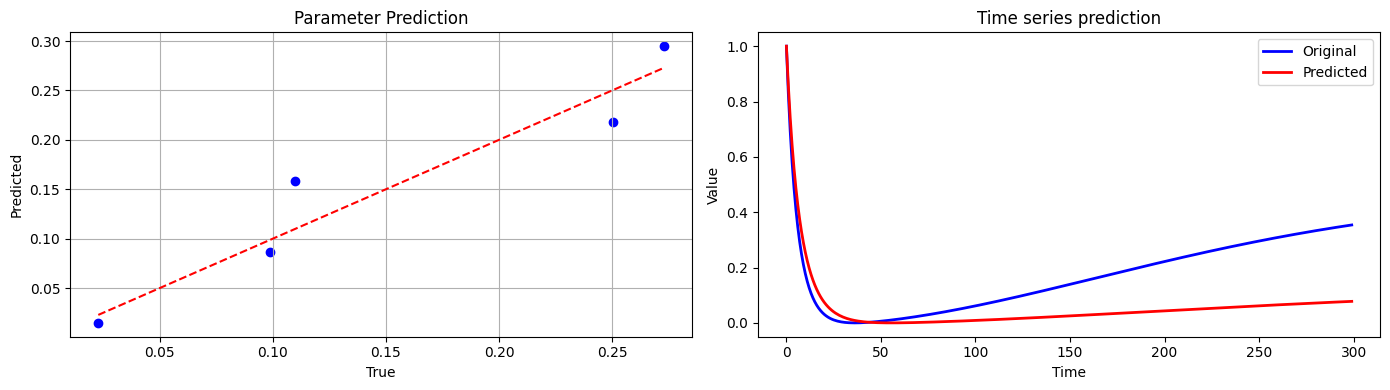

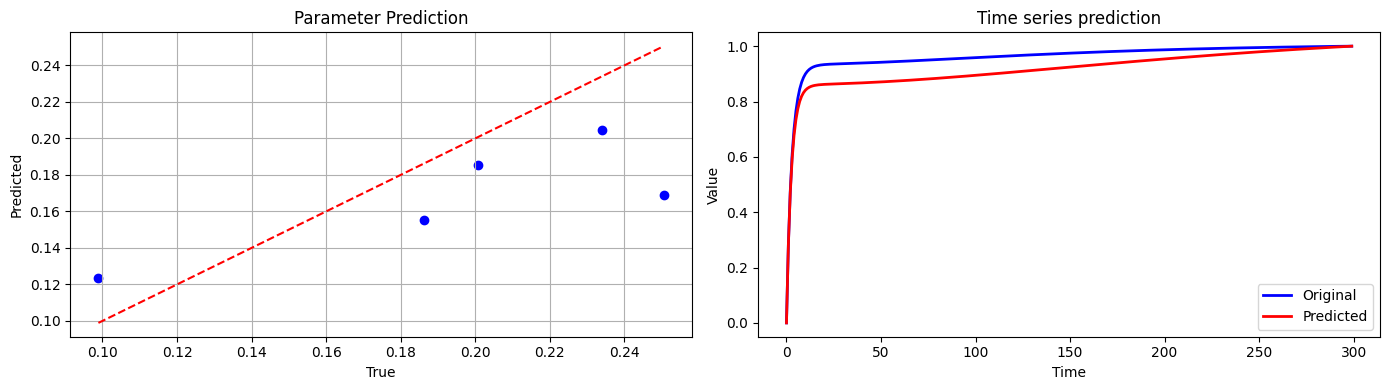

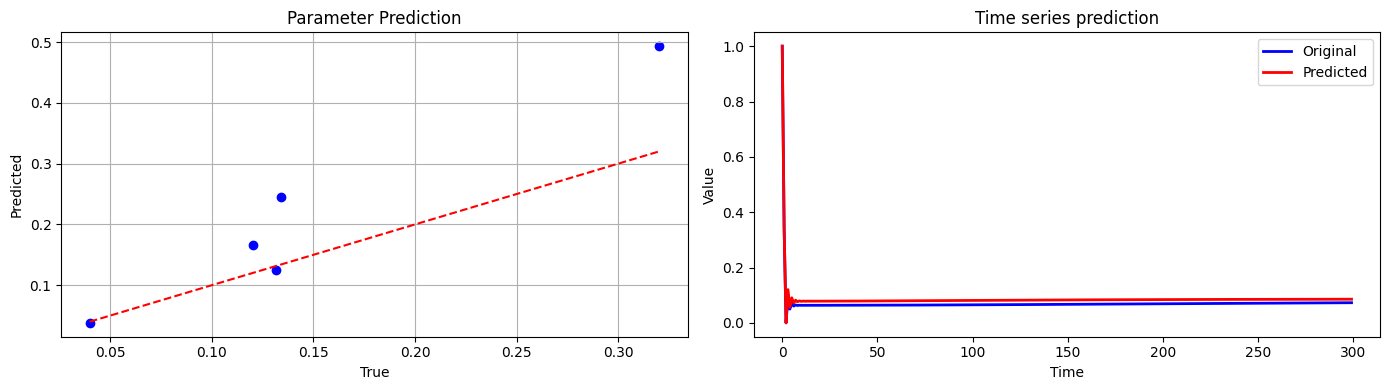

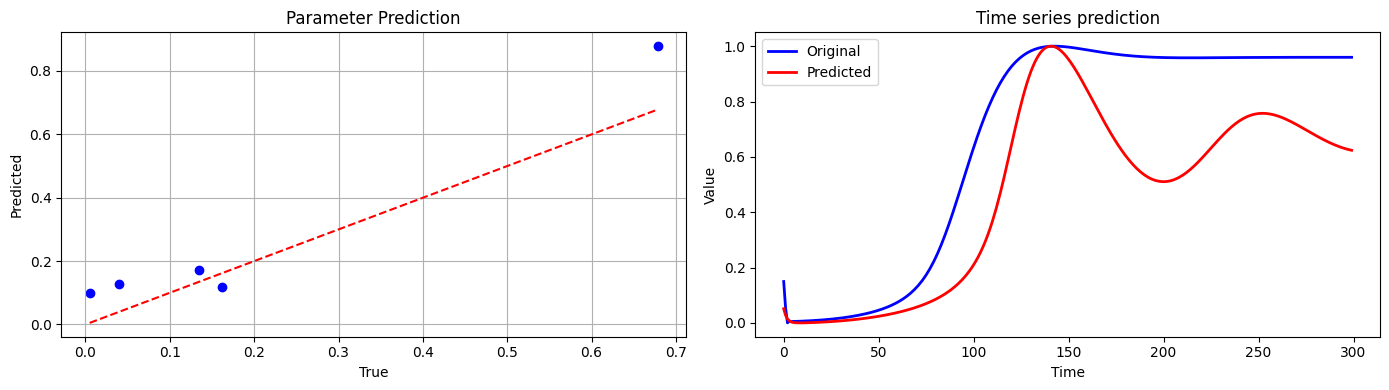

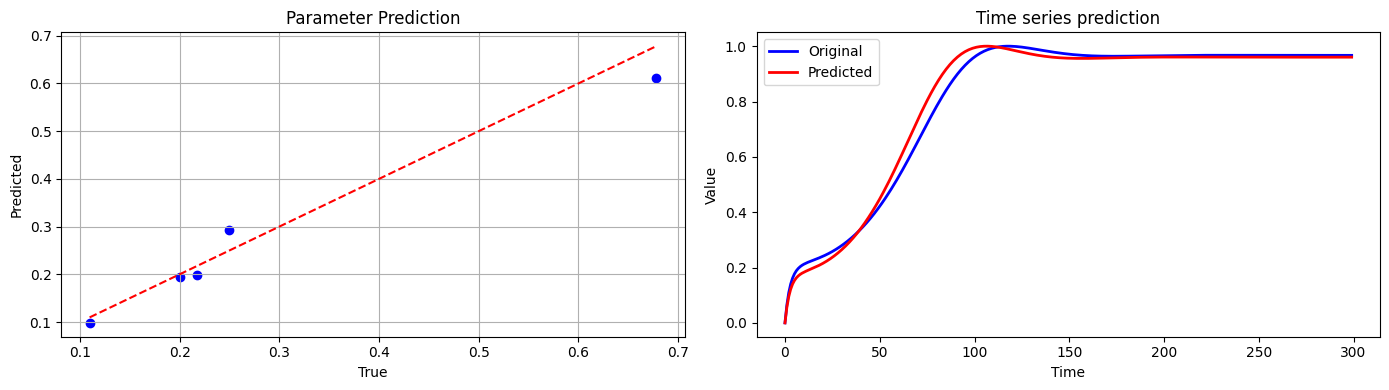

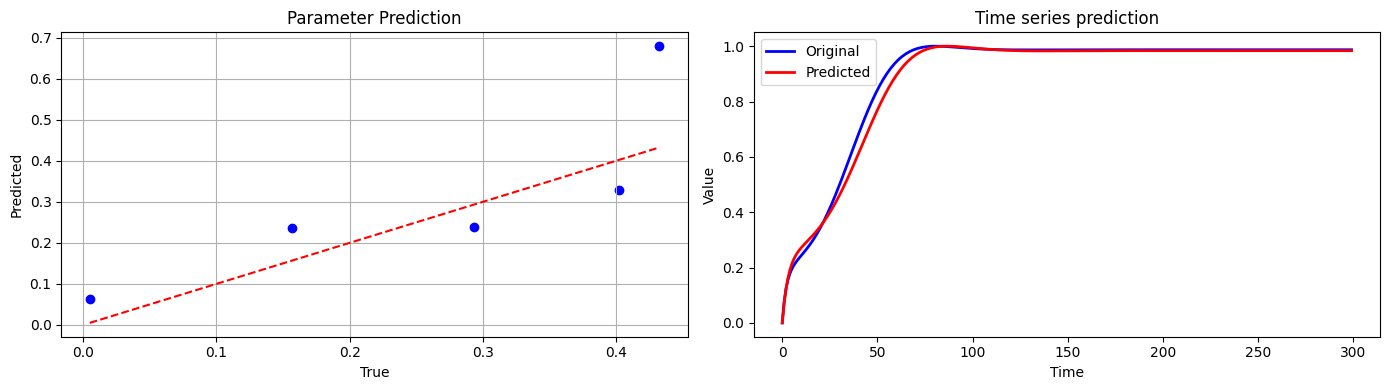

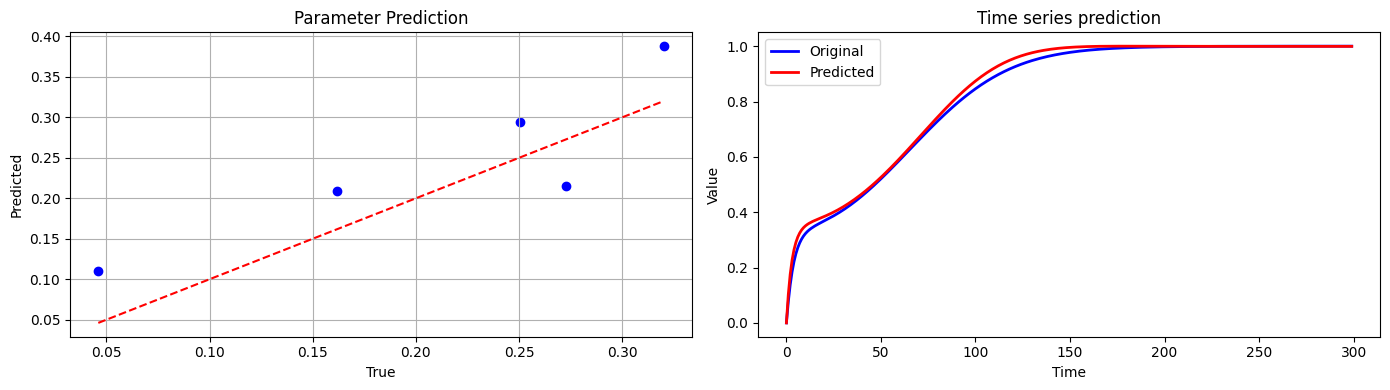

In [110]:
plot_graphs(10, X_train, y_train, yhat)

## **Cross Validation set**

In [111]:
yhat_cv = model.predict(X_cv)
yhat_cv = pd.DataFrame(yhat_cv)
yhat_cv

25/25 [==============================] - 0s 1ms/step


,0,1,2,3,4
0,0.183025,0.273343,0.745704,0.068984,0.149177
1,0.109429,0.306188,0.263409,0.087414,0.183864
2,0.247591,0.359093,0.463114,0.116205,0.241947
3,-0.031502,0.408204,0.245254,0.150498,0.280396
4,0.093401,0.372252,0.334779,0.104642,0.175560
...,...,...,...,...,...
773,0.208568,0.254619,0.097374,0.145437,0.199080
774,0.212400,0.203656,0.644907,0.121200,0.202207
775,0.248202,0.344005,0.860180,0.070062,0.231455
776,0.140662,0.255496,0.432344,0.064263,0.181917


In [112]:
y_cv

,v2,a2,IP3,d5,k3
4085,0.217040,0.250560,0.678186,0.120110,0.140326
42,0.022892,0.250560,0.098905,0.004980,0.272739
2397,0.233976,0.401870,0.571412,0.190026,0.225123
1143,0.022892,0.401870,0.098905,0.046061,0.225123
1122,0.022892,0.401870,0.098905,0.004980,0.272739
...,...,...,...,...,...
2212,0.233976,0.339615,0.098905,0.120110,0.200704
3261,0.131523,0.249941,0.571412,0.190026,0.225123
6160,0.293397,0.339615,1.364390,0.186241,0.200704
3034,0.131523,0.134219,0.571412,0.004980,0.200704


In [113]:
rmse(np.array(y_cv), np.array(yhat_cv))

0.21744018436017898

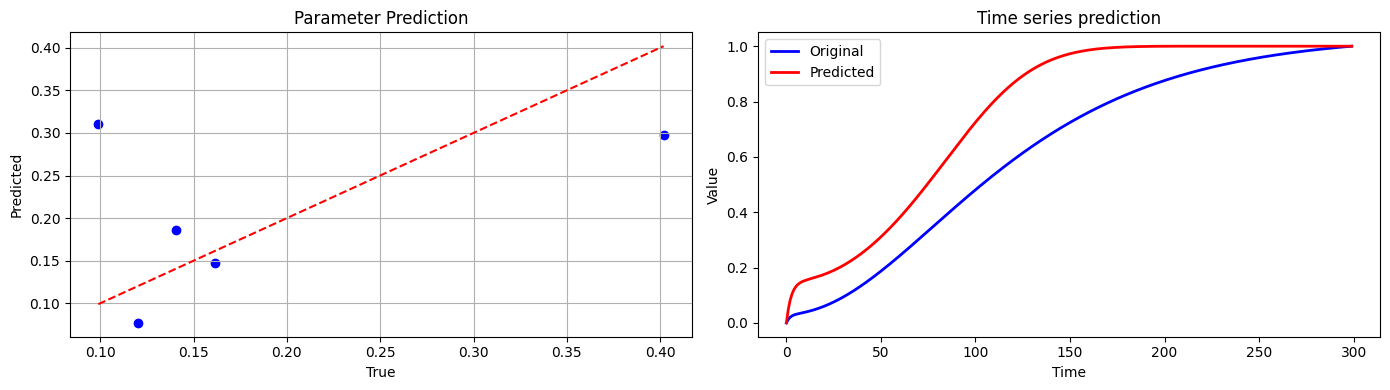

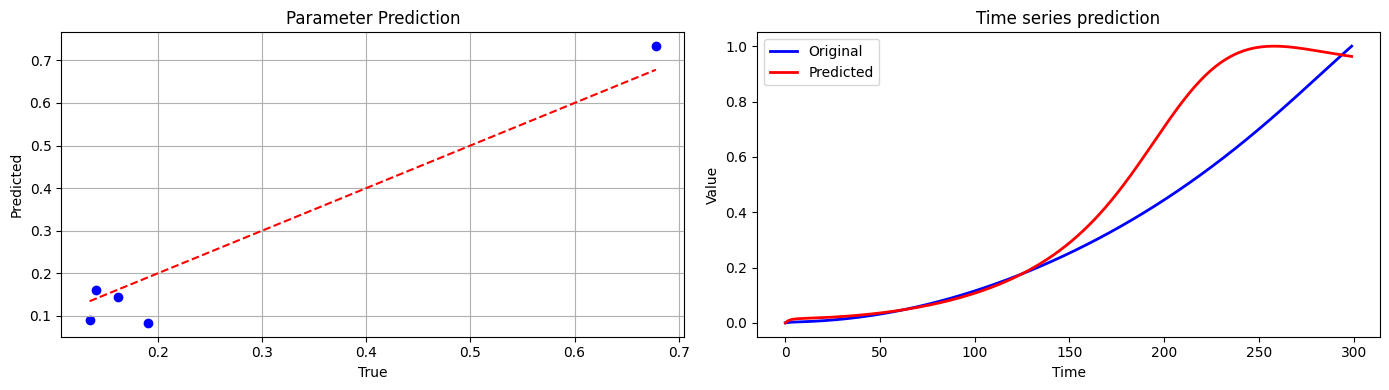

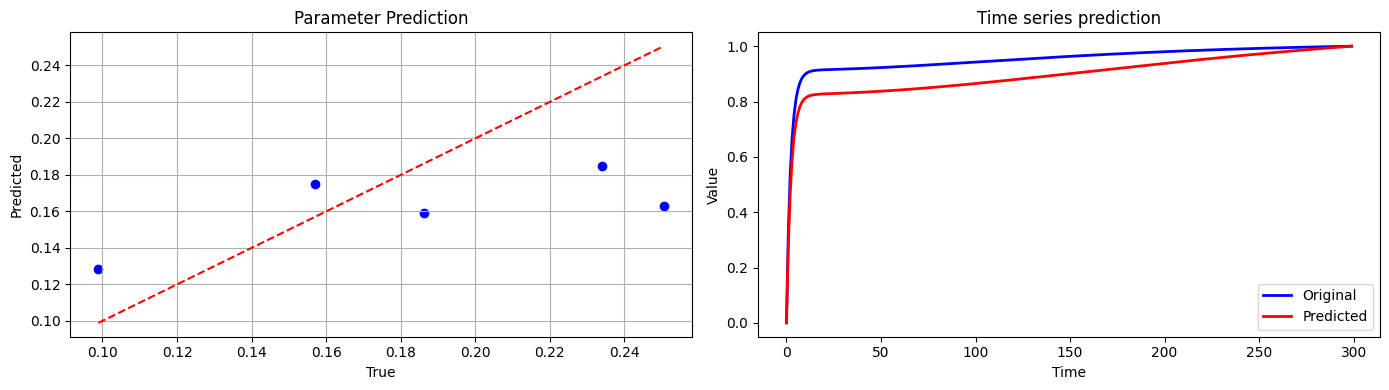

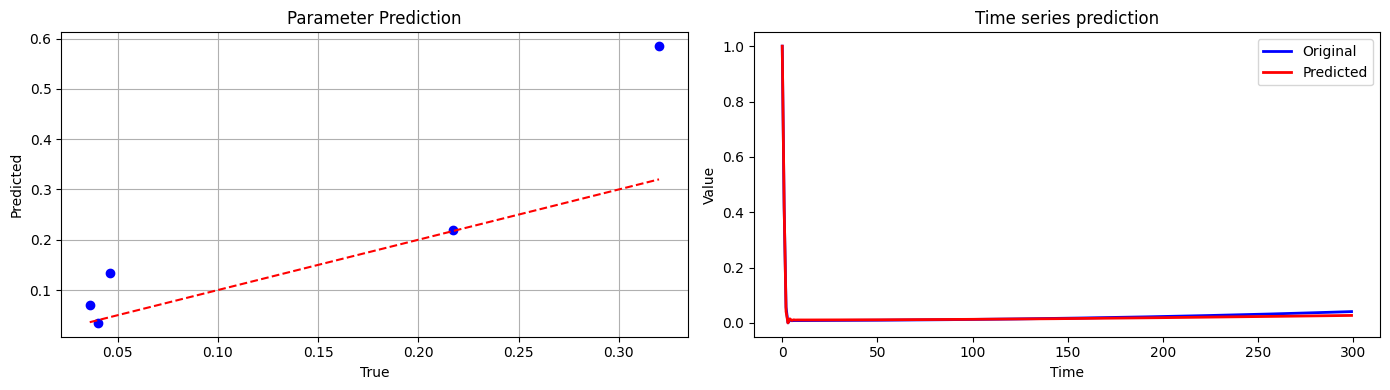

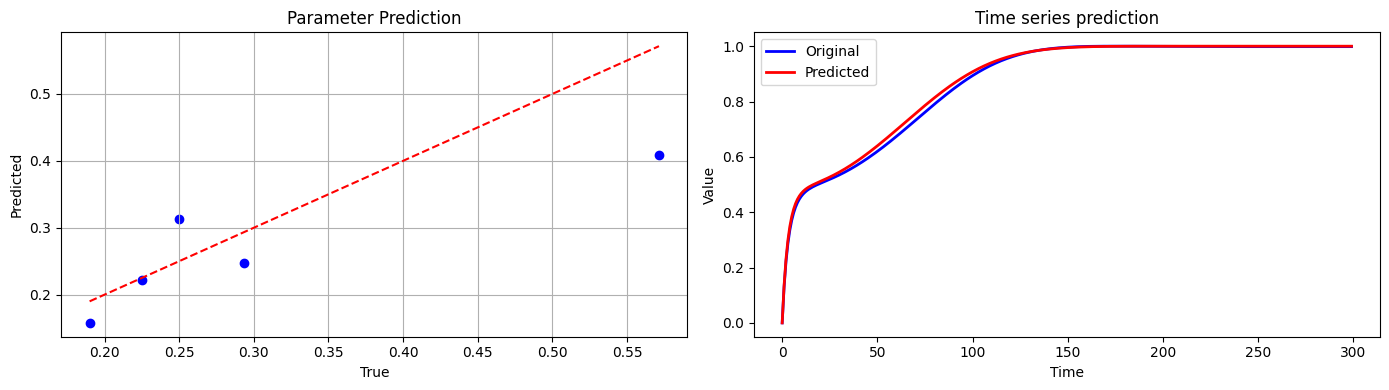

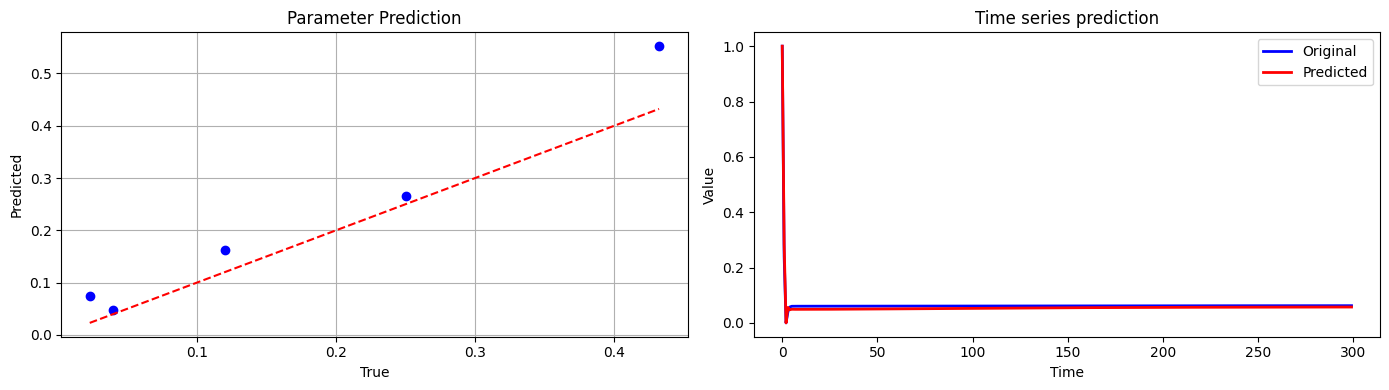

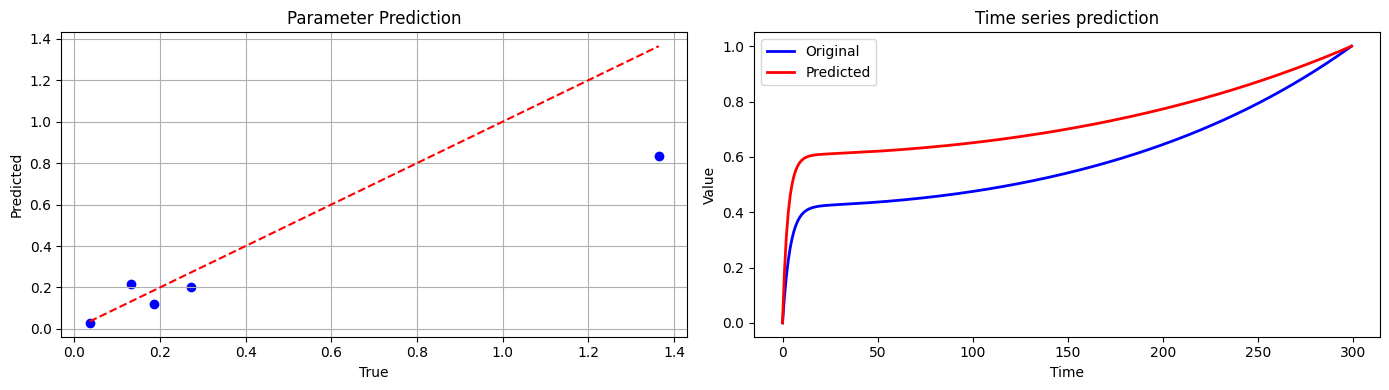

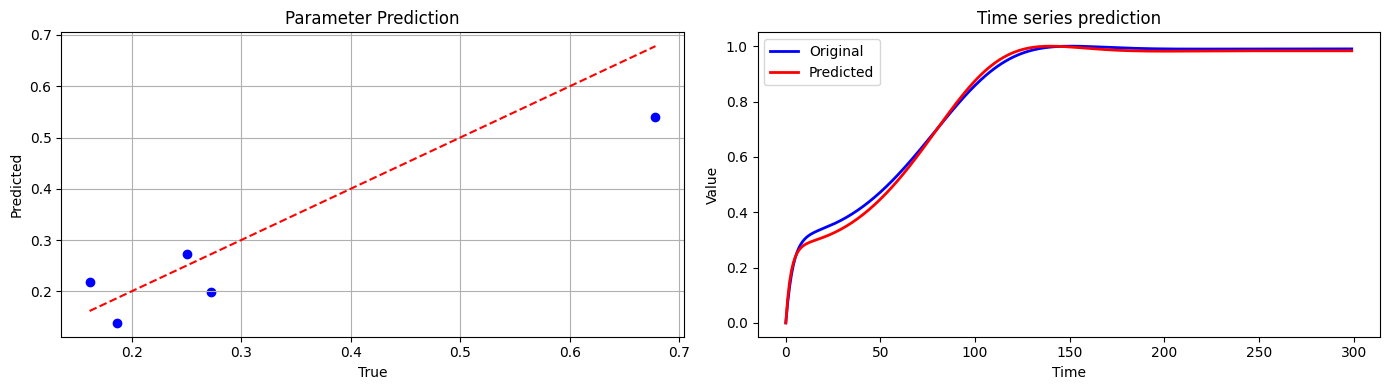

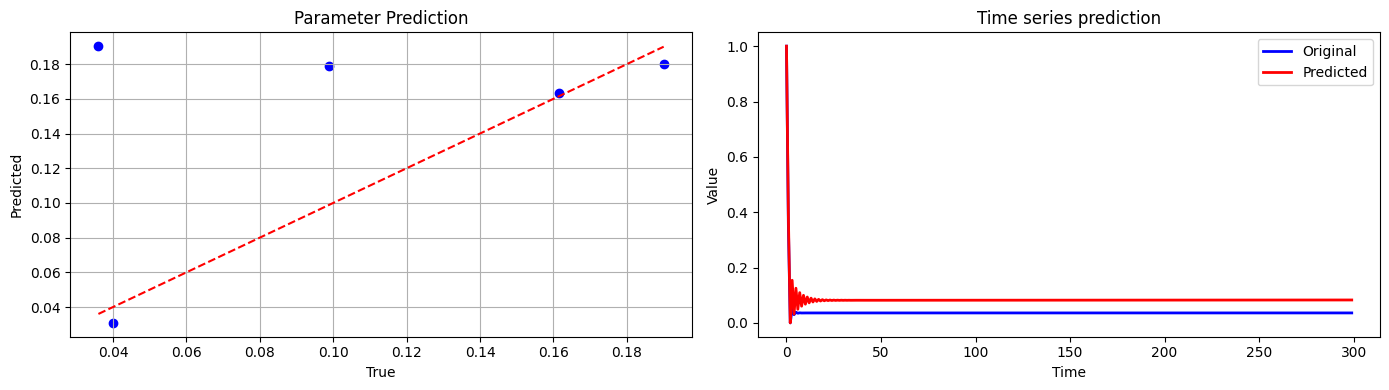

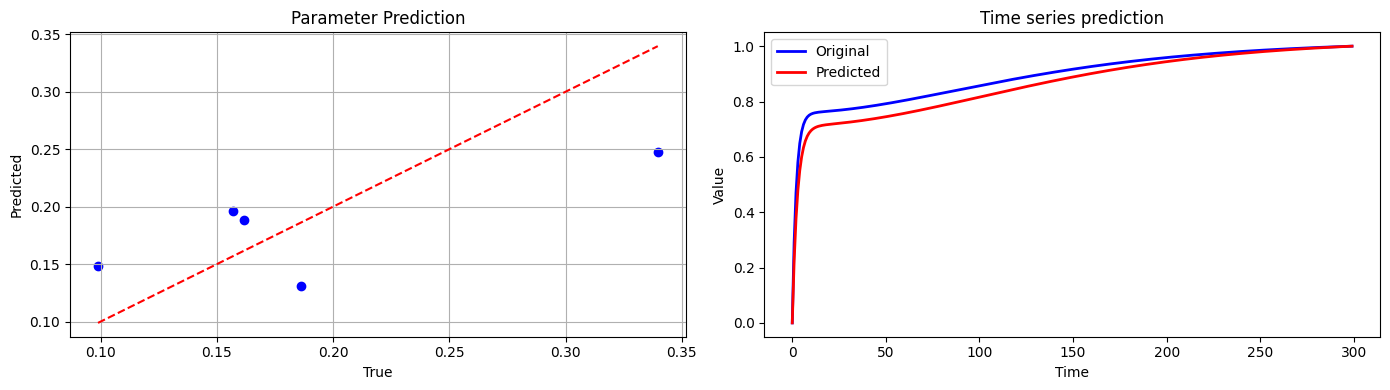

In [ ]:
plot_graphs(10, X_cv, y_cv, yhat_cv)

## **Test set**

In [115]:
yhat_test = model.predict(X_test)
yhat_test = pd.DataFrame(yhat_test)
yhat_test

25/25 [==============================] - 0s 995us/step


,0,1,2,3,4
0,0.140823,0.345509,1.329691,0.071168,0.116887
1,0.240685,0.238069,0.518939,0.158479,0.206616
2,0.216040,0.018017,0.463927,0.117442,0.199847
3,0.137920,0.254054,0.493301,0.062205,0.174535
4,0.083019,0.350201,0.452740,0.096106,0.154562
...,...,...,...,...,...
773,0.065112,0.251066,0.380425,0.101204,0.173196
774,0.116216,0.281294,0.419794,0.074668,0.170485
775,0.090635,0.156691,0.442435,0.086575,0.151503
776,0.239733,0.209302,0.436189,0.139869,0.218247


In [116]:
y_test

,v2,a2,IP3,d5,k3
2509,0.233976,0.401870,1.364390,0.046061,0.039951
3891,0.217040,0.250560,0.571412,0.186241,0.225123
6712,0.161549,0.036026,0.571412,0.120110,0.200704
3214,0.131523,0.134219,0.678186,0.004980,0.200704
6199,0.293397,0.339615,0.320078,0.004980,0.039951
...,...,...,...,...,...
1022,0.022892,0.339615,0.320078,0.120110,0.157024
528,0.022892,0.134219,0.432218,0.046061,0.272739
533,0.022892,0.134219,0.432218,0.046061,0.140326
4612,0.217040,0.249941,0.432218,0.186241,0.200704


In [117]:
rmse(np.array(y_test), np.array(yhat_test))

0.22533082870162613

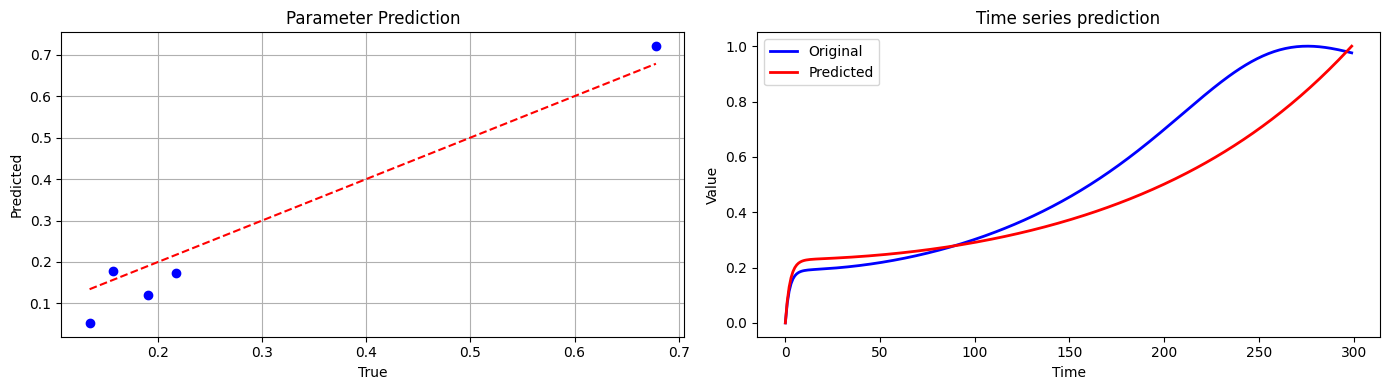

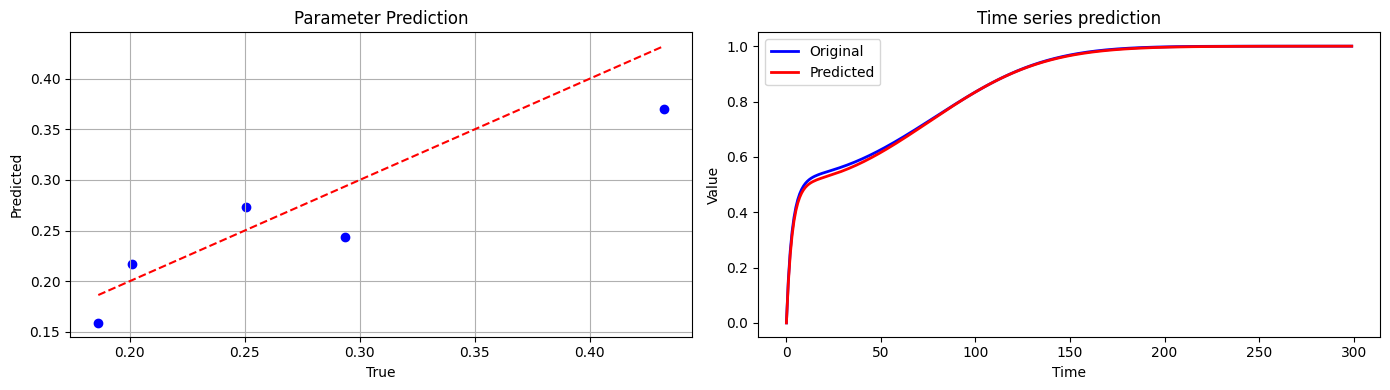

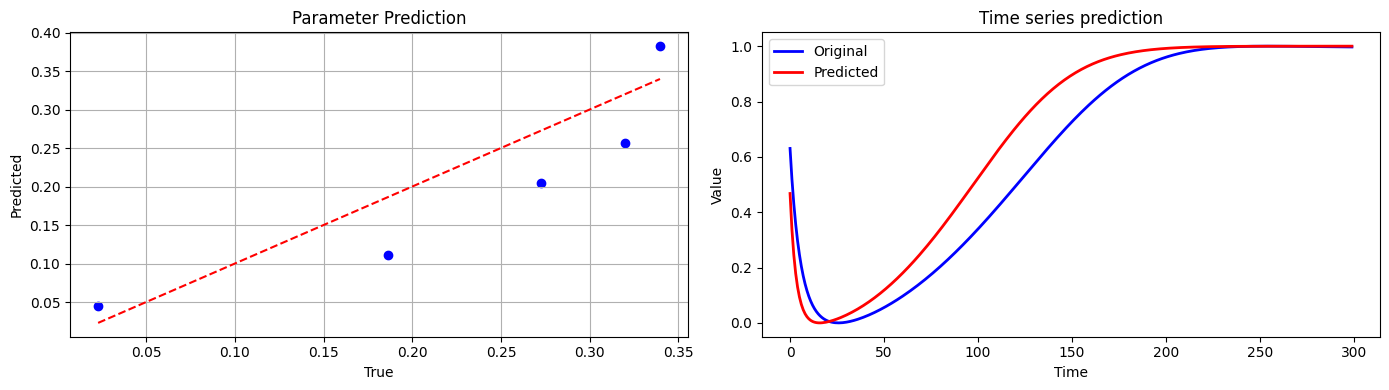

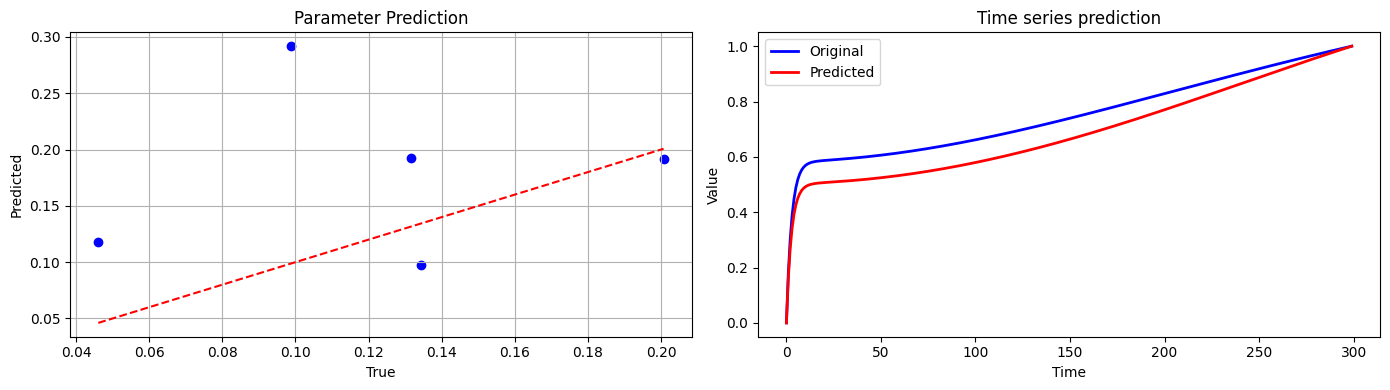

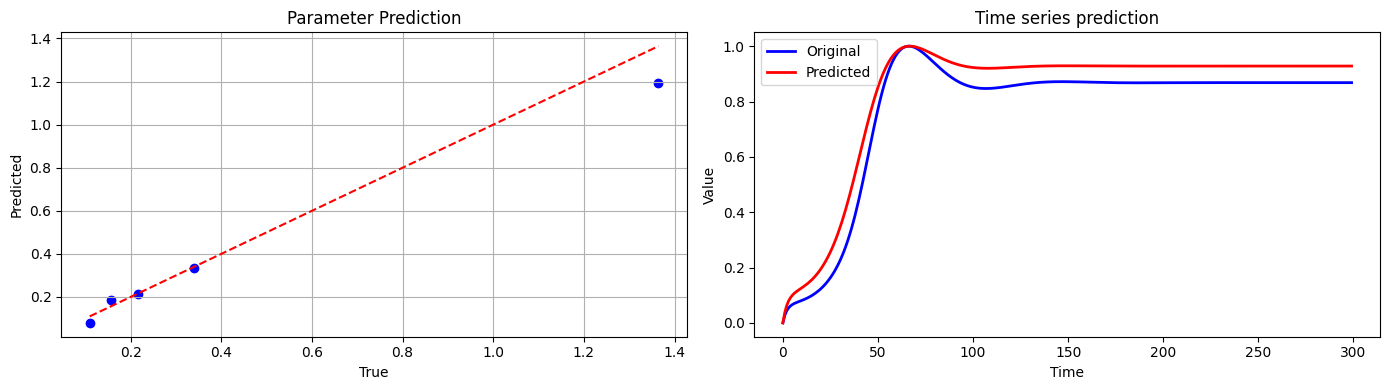

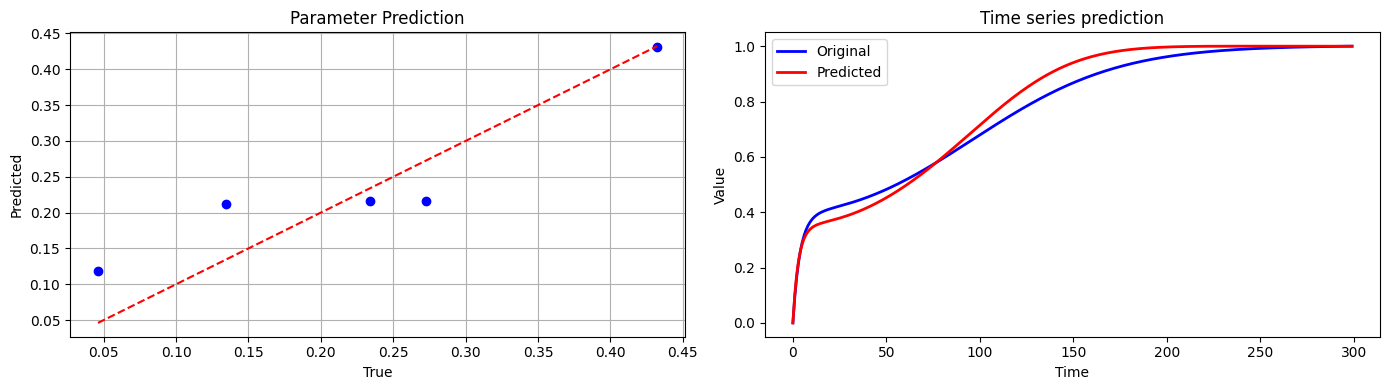

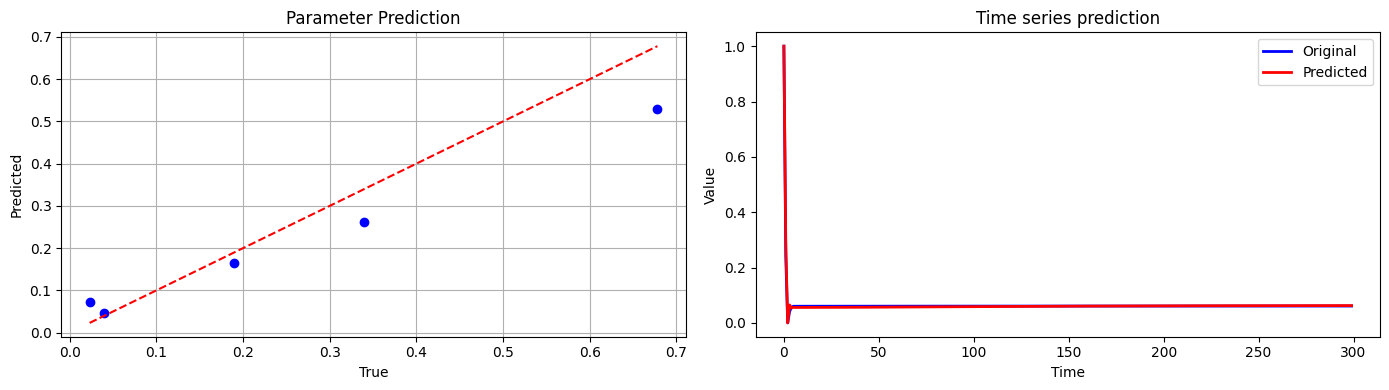

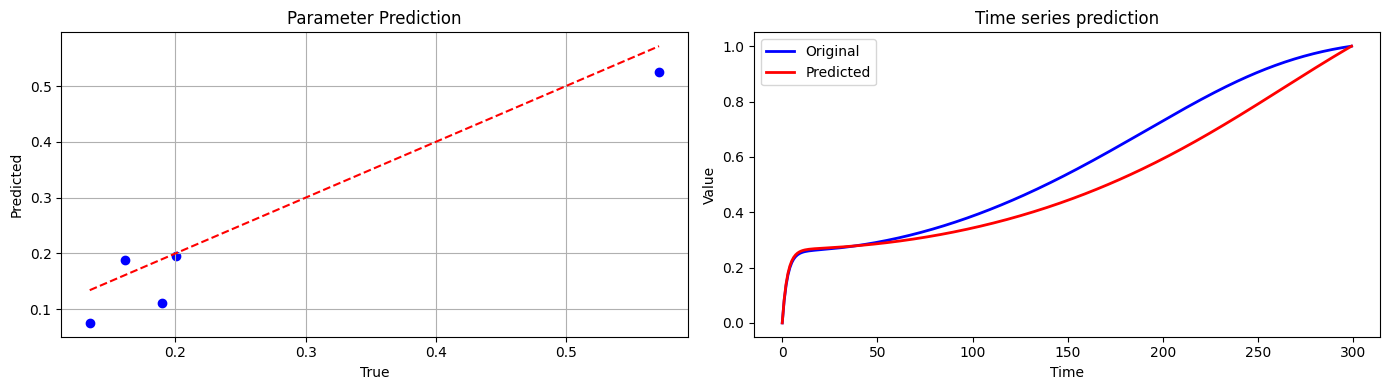

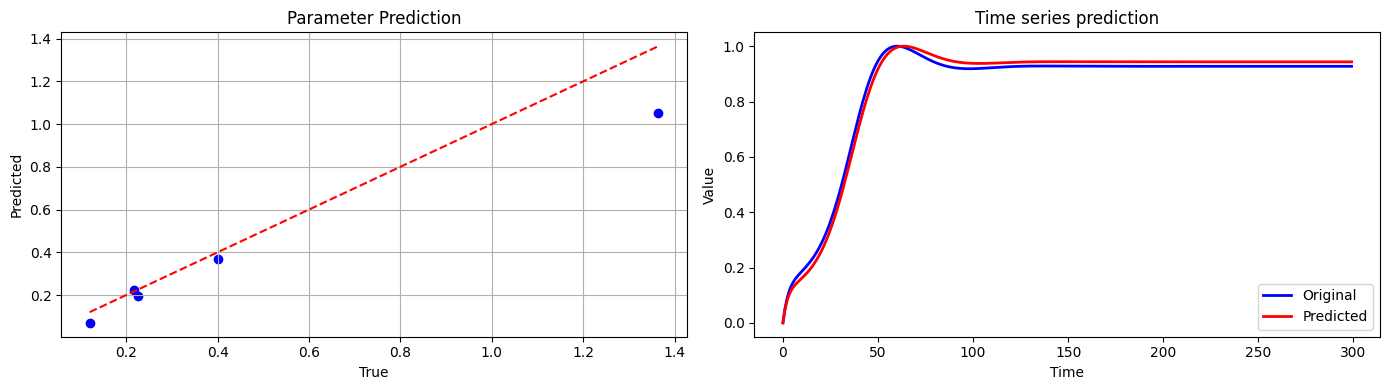

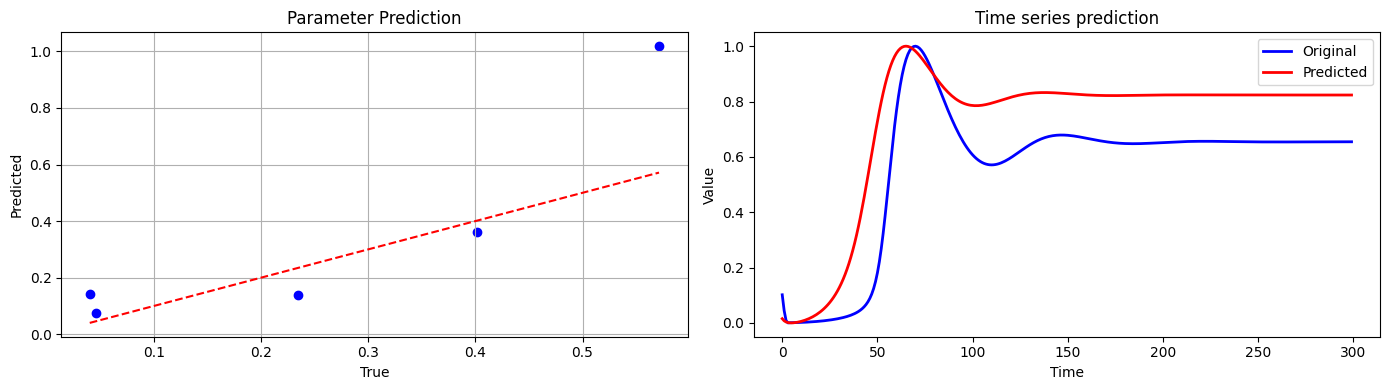

In [119]:
plot_graphs(10, X_test, y_test, yhat_test)